# Coronavirus Pandemic in Brazil
### Project Data - 07/26/2021


- Cases
- Deaths
- Vaccination


Mathieu, E., Ritchie, H., Ortiz-Ospina, E. et al.<p>
A global database of COVID-19 vaccinations.<p>
Nat Hum Behav (2021). https://ourworldindata.org/covid-vaccinations?country=BRA<p><p>

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading Data

In [2]:
df = pd.read_csv('./owid-covid-data.csv')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [3]:
df_brazil = df.loc[df['location'] == 'Brazil']
df_brazil.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
13314,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,...,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN
13315,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN
13316,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN
13317,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,...,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,9.91
13318,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,...,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN


In [4]:
df_brazil.shape

(515, 60)

In [5]:
df_brazil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515 entries, 13314 to 13828
Data columns (total 60 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               515 non-null    object 
 1   continent                              515 non-null    object 
 2   location                               515 non-null    object 
 3   date                                   515 non-null    object 
 4   total_cases                            515 non-null    float64
 5   new_cases                              515 non-null    float64
 6   new_cases_smoothed                     510 non-null    float64
 7   total_deaths                           495 non-null    float64
 8   new_deaths                             495 non-null    float64
 9   new_deaths_smoothed                    510 non-null    float64
 10  total_cases_per_million                515 non-null    float64
 11  

In [6]:
df_brazil_vac = df_brazil.loc[df['people_vaccinated'] >= 1]
df_brazil_vac[['date','people_vaccinated']]

,date,people_vaccinated
13640,2021-01-17,112.0
13641,2021-01-18,1109.0
13642,2021-01-19,11470.0
13643,2021-01-20,28543.0
13644,2021-01-21,136519.0
...,...,...
13824,2021-07-20,95589624.0
13825,2021-07-21,96240322.0
13826,2021-07-22,97420756.0
13827,2021-07-23,98268594.0


## Data Visualization

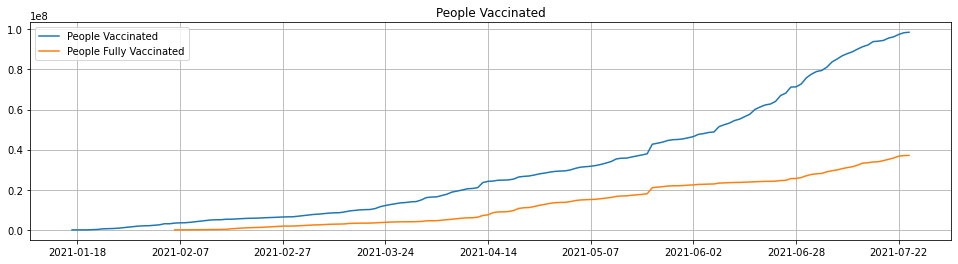

In [7]:
# vaccinations
plt.figure(figsize=(16.5,4))
plt.title('People Vaccinated')
plt.xticks(range(1, (np.size(df_brazil_vac['date']) + 1), 20))

plt.plot(df_brazil_vac['date'], df_brazil_vac['people_vaccinated'], label='People Vaccinated')
plt.plot(df_brazil_vac['date'], df_brazil_vac['people_fully_vaccinated'], label='People Fully Vaccinated')

plt.grid(True)
plt.legend()
plt.show()

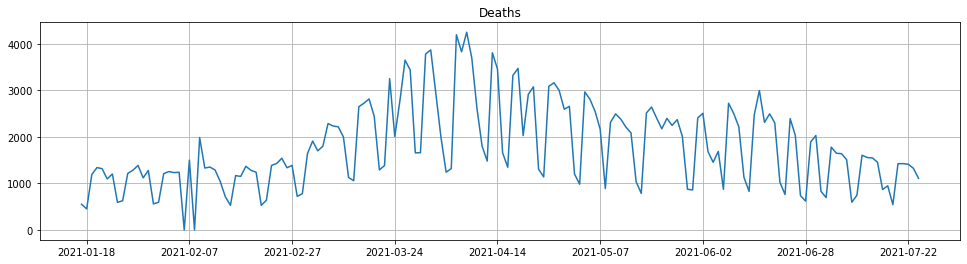

In [8]:
# deaths
plt.figure(figsize=(16.5,4))
plt.title('Deaths')
plt.xticks(range(1, (np.size(df_brazil_vac['date']) + 1), 20))

plt.plot(df_brazil_vac['date'], df_brazil_vac['new_deaths'])

plt.grid(True)
plt.show()